In [13]:
# Dependencies
import os
import pathlib
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from uszipcode import SearchEngine


In [14]:
# Study data files
last_path = "./data/merged_df_cleaned.csv"

In [15]:
# Read the brewery data and the study results
last_df = pd.read_csv(last_path, index_col="City")

In [48]:
# Display dataframe
last_df.head()

,name,brewery_type,address_1,State,postal_code,longitude,latitude,state_x,zip_code,brewery_id,...,housing_in_structure_percent,population_total,population_over_21,population_over_21_percent,population_15_to_19,population_15_to_19_percent,population_male_over_18,population_male_over_18_percent,population_female_over_18,population_female_over_18_percent
City,,,,,,,,,,,,,,,,,,,,,
Norman,(405) Brewing Co,micro,1716 Topeka St,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069.0,1,...,57307.0,128087.0,92914.0,72.5,12803.0,10.0,52250.0,48.7,54931.0,51.3
San Diego,10 Barrel Brewing Co,large,1501 E St,California,92101-6618,-117.129593,32.714813,California,92101.0,3,...,555456.0,1381600.0,1057949.0,76.6,87255.0,6.3,574112.0,51.2,547406.0,48.8
Bend,10 Barrel Brewing Co,large,62970 18th St,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701.0,4,...,47882.0,102079.0,80025.0,78.4,5002.0,4.9,40641.0,49.5,41473.0,50.5
Bend,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703.0,5,...,47882.0,102079.0,80025.0,78.4,5002.0,4.9,40641.0,49.5,41473.0,50.5
Portland,10 Barrel Brewing Co,large,1411 NW Flanders St,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209.0,6,...,303483.0,642218.0,515575.0,80.3,31016.0,4.8,264448.0,49.4,270792.0,50.6


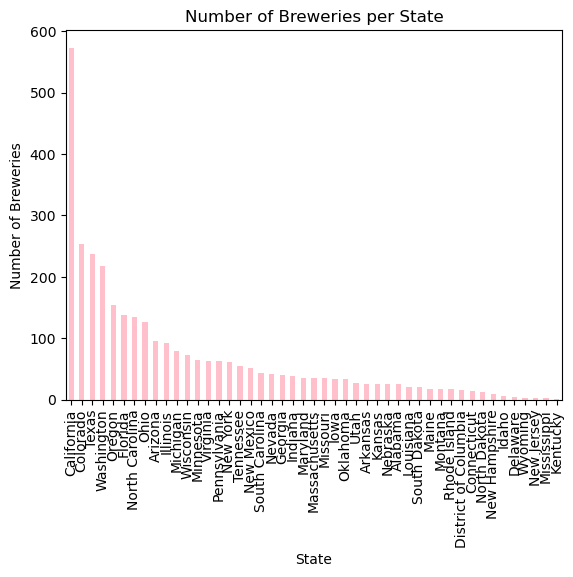

In [17]:
# plot Breweries per State
data_count = last_df["State"].value_counts()
plot_pandas = data_count.plot.bar(color='pink')  
plt.xlabel("State")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries per State")
plt.savefig("./data/perState.png")

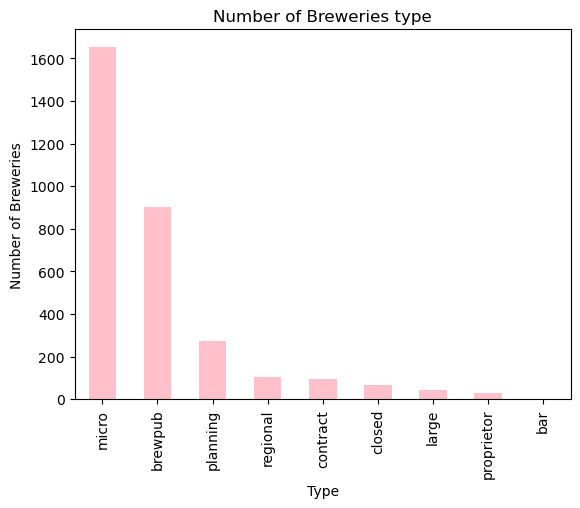

In [18]:
# Plot per type
data_count4 =last_df["brewery_type"].value_counts()
plot_pandas = data_count4.plot.bar(color='pink')  
plt.xlabel("Type")
plt.ylabel("Number of Breweries")
plt.title("Number of Breweries type")
plt.savefig("./data/type.png")

In [19]:
# Plot brewery type per state
countState = last_df.groupby(["State", "brewery_type"])["brewery_type"].count()
countState

State      brewery_type
Alabama    brewpub          3
           contract         1
           micro           17
           planning         4
Arizona    brewpub         36
                           ..
Wisconsin  planning         3
           proprietor       1
           regional         2
Wyoming    brewpub          1
           micro            2
Name: brewery_type, Length: 229, dtype: int64

In [20]:
countStateindex = countState.index
countStateindex

MultiIndex([(   'Alabama',    'brewpub'),
            (   'Alabama',   'contract'),
            (   'Alabama',      'micro'),
            (   'Alabama',   'planning'),
            (   'Arizona',    'brewpub'),
            (   'Arizona',   'contract'),
            (   'Arizona',      'large'),
            (   'Arizona',      'micro'),
            (   'Arizona',   'planning'),
            (   'Arizona',   'regional'),
            ...
            ('Washington',   'regional'),
            ( 'Wisconsin',    'brewpub'),
            ( 'Wisconsin',   'contract'),
            ( 'Wisconsin',      'large'),
            ( 'Wisconsin',      'micro'),
            ( 'Wisconsin',   'planning'),
            ( 'Wisconsin', 'proprietor'),
            ( 'Wisconsin',   'regional'),
            (   'Wyoming',    'brewpub'),
            (   'Wyoming',      'micro')],
           names=['State', 'brewery_type'], length=229)

In [21]:
countStateindex2 = countState.unstack()
countStateindex2

brewery_type,bar,brewpub,closed,contract,large,micro,planning,proprietor,regional
State,,,,,,,,,
Alabama,NaN,3.0,NaN,1.0,NaN,17.0,4.0,NaN,NaN
Arizona,NaN,36.0,NaN,4.0,2.0,42.0,10.0,NaN,1.0
Arkansas,NaN,10.0,NaN,1.0,NaN,14.0,1.0,NaN,NaN
California,NaN,142.0,29.0,16.0,12.0,304.0,41.0,9.0,20.0
Colorado,NaN,62.0,NaN,7.0,4.0,144.0,24.0,2.0,10.0
Connecticut,NaN,5.0,NaN,1.0,NaN,7.0,2.0,NaN,NaN
Delaware,NaN,2.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN
District of Columbia,NaN,6.0,NaN,2.0,NaN,5.0,2.0,NaN,1.0
Florida,NaN,24.0,NaN,3.0,3.0,84.0,20.0,1.0,3.0


<Axes: xlabel='State'>

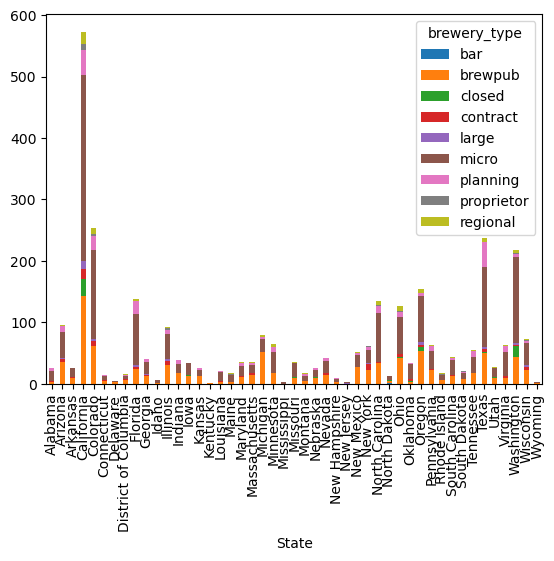

In [22]:
# Plot states stacked
countStateindex2.plot(kind='bar', stacked=True)

<Axes: xlabel='State'>

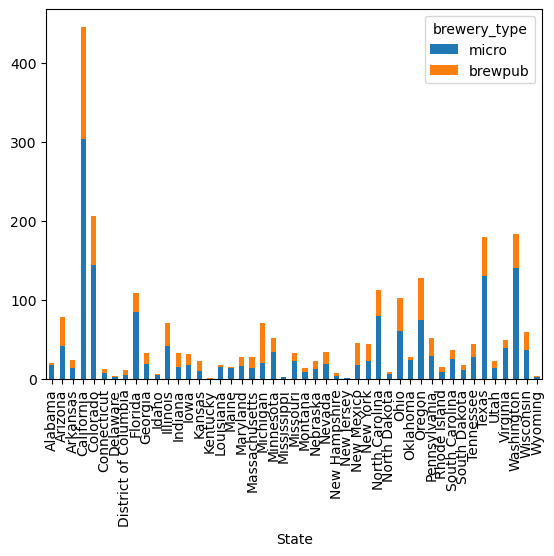

In [77]:
microbrewState = countStateindex2.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)
microbrewState

In [24]:
# Plot brewery type top 10 states
topstates = countStateindex2.loc[["California", "Colorado", "Texas", "Washington","Oregon", "Florida", "North Carolina", "Ohio", "Arizona", "Illinois"]]
topstates

brewery_type,bar,brewpub,closed,contract,large,micro,planning,proprietor,regional
State,,,,,,,,,
California,NaN,142.0,29.0,16.0,12.0,304.0,41.0,9.0,20.0
Colorado,NaN,62.0,NaN,7.0,4.0,144.0,24.0,2.0,10.0
Texas,NaN,50.0,2.0,5.0,3.0,130.0,40.0,NaN,7.0
Washington,NaN,44.0,17.0,2.0,3.0,140.0,5.0,1.0,5.0
Oregon,NaN,53.0,7.0,3.0,5.0,74.0,5.0,1.0,7.0
Florida,NaN,24.0,NaN,3.0,3.0,84.0,20.0,1.0,3.0
North Carolina,NaN,34.0,NaN,1.0,1.0,79.0,11.0,2.0,6.0
Ohio,NaN,42.0,1.0,5.0,1.0,60.0,8.0,1.0,8.0
Arizona,NaN,36.0,NaN,4.0,2.0,42.0,10.0,NaN,1.0


Text(0, 0.5, 'Number of Breweries')

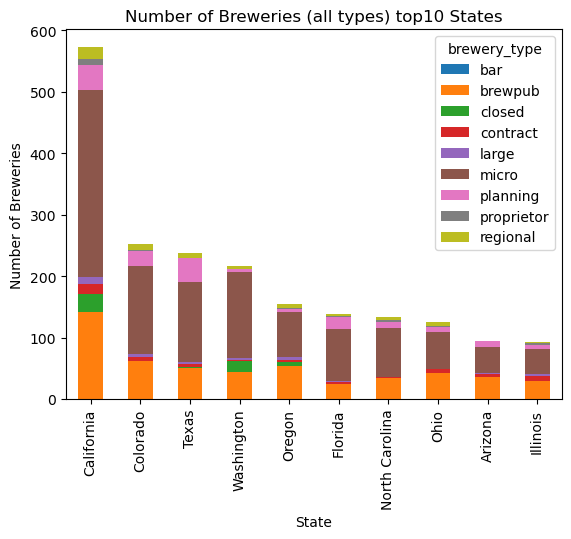

In [96]:
topstates.plot(kind='bar', stacked=True)
plt.title('Number of Breweries (all types) top10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

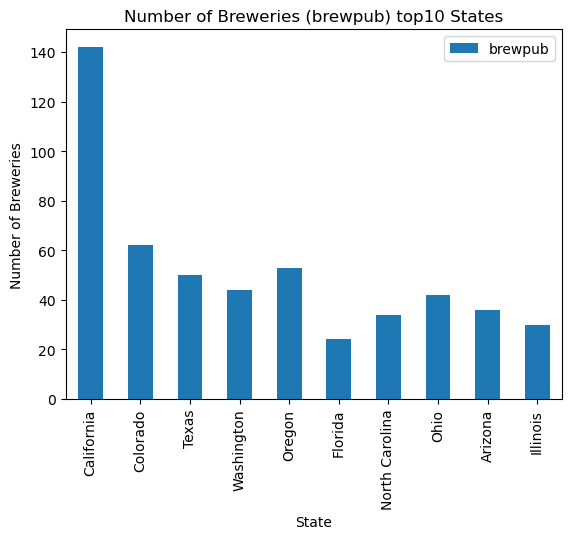

In [97]:
topstates.plot(kind='bar', y='brewpub', stacked=True)
plt.title('Number of Breweries (brewpub) top10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

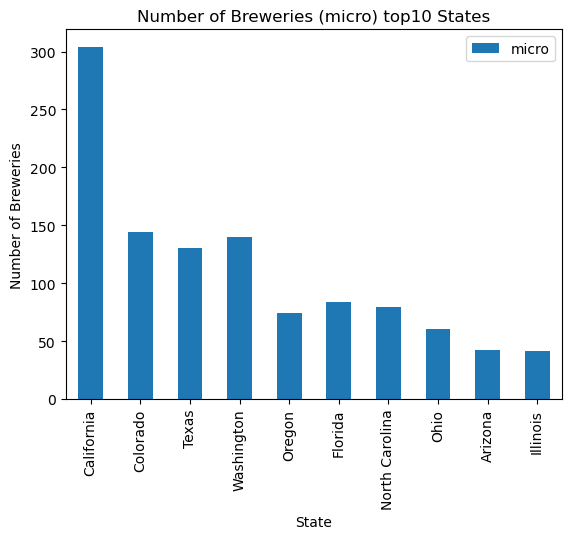

In [98]:
topstates.plot(kind='bar', y='micro', stacked=True)
plt.title('Number of Breweries (micro) top10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

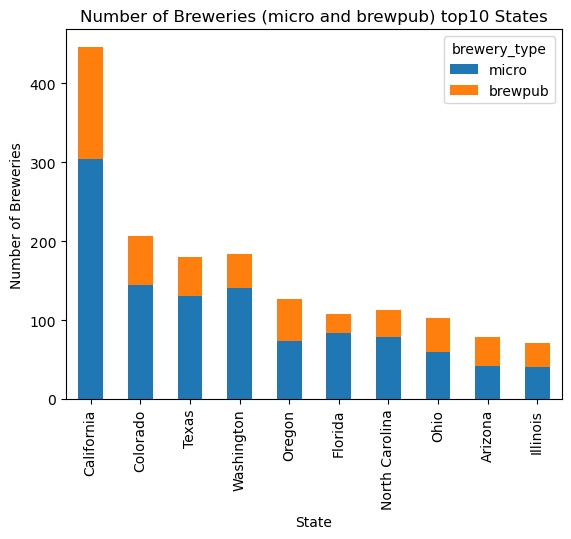

In [99]:
topstates.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)
plt.title('Number of Breweries (micro and brewpub) top10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

In [29]:
# Plot brewery type tail 10 states
tailstates = countStateindex2.loc[["District of Columbia","Connecticut", "North Dakota", "New Hampshire", "Idaho", "Delaware", "Wyoming", "New Jersey", "Mississippi", "Kentucky"]]
tailstates

brewery_type,bar,brewpub,closed,contract,large,micro,planning,proprietor,regional
State,,,,,,,,,
District of Columbia,NaN,6.0,NaN,2.0,NaN,5.0,2.0,NaN,1.0
Connecticut,NaN,5.0,NaN,1.0,NaN,7.0,2.0,NaN,NaN
North Dakota,1.0,3.0,2.0,NaN,NaN,6.0,NaN,NaN,NaN
New Hampshire,NaN,3.0,NaN,NaN,NaN,4.0,3.0,NaN,NaN
Idaho,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
Delaware,NaN,2.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN
Wyoming,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
New Jersey,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
Mississippi,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


Text(0, 0.5, 'Number of Breweries')

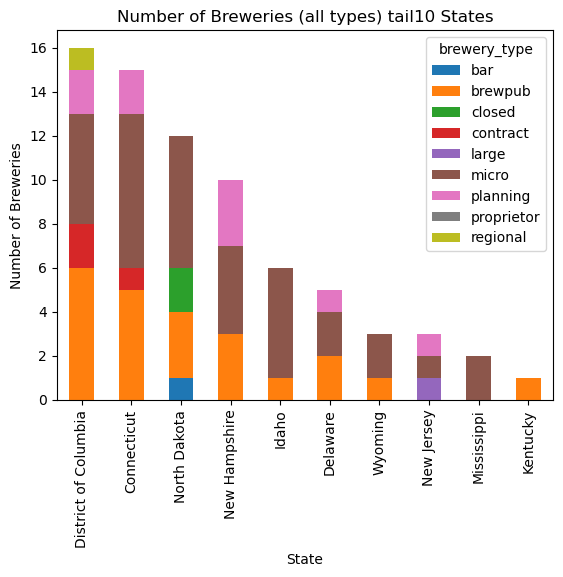

In [100]:
tailstates.plot(kind='bar', stacked=True)
plt.title('Number of Breweries (all types) tail10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

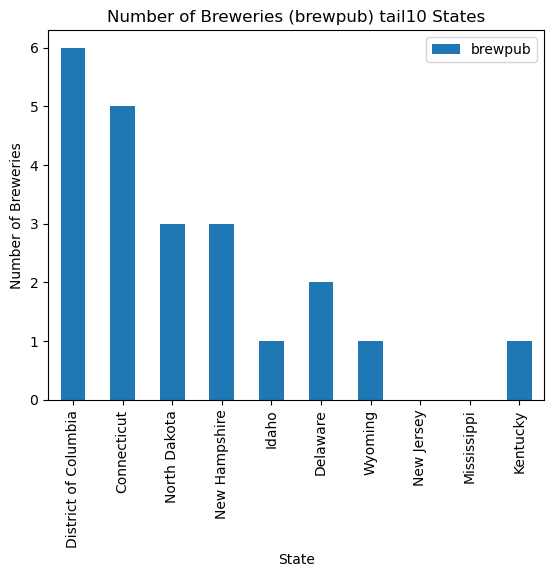

In [101]:
tailstates.plot(kind='bar', y='brewpub', stacked=True)
plt.title('Number of Breweries (brewpub) tail10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

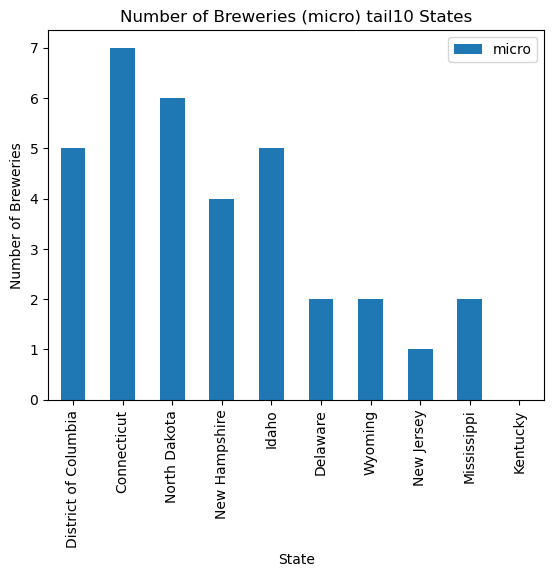

In [102]:
tailstates.plot(kind='bar', y='micro', stacked=True)
plt.title('Number of Breweries (micro) tail10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

Text(0, 0.5, 'Number of Breweries')

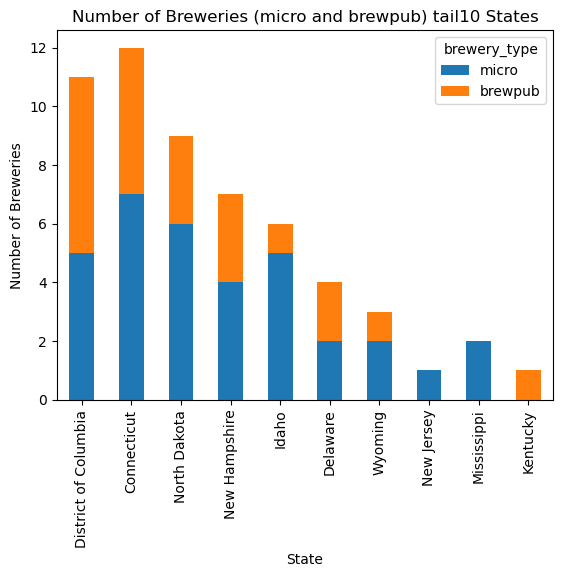

In [103]:
tailstates.plot(kind='bar', y=['micro', 'brewpub'], stacked=True)
plt.title('Number of Breweries (micro and brewpub) tail10 States')
plt.xlabel('State')
plt.ylabel('Number of Breweries')

# Demographics for top states and cities

In [49]:
# Demographics total population
demogtotpopState = last_df.groupby(['State']).population_total.mean()
demogtotpopState

State
Alabama                 1.848174e+05
Arizona                 5.521978e+05
Arkansas                1.308208e+05
California              5.989280e+05
Colorado                3.830943e+05
Connecticut             1.174187e+05
Delaware                7.075000e+04
District of Columbia    6.700500e+05
Florida                 3.148469e+05
Georgia                 3.281682e+05
Idaho                   9.638450e+04
Illinois                1.891584e+06
Indiana                 1.263091e+05
Iowa                    1.177969e+05
Kansas                  2.384000e+05
Kentucky                7.351300e+04
Louisiana               2.980362e+05
Maine                   6.832900e+04
Maryland                3.534469e+05
Massachusetts           2.834689e+05
Michigan                2.157166e+05
Minnesota               2.878723e+05
Mississippi             1.109545e+05
Missouri                3.653452e+05
Montana                 9.238300e+04
Nebraska                3.974601e+05
Nevada                  3.833544

Text(0, 0.5, 'Total Population')

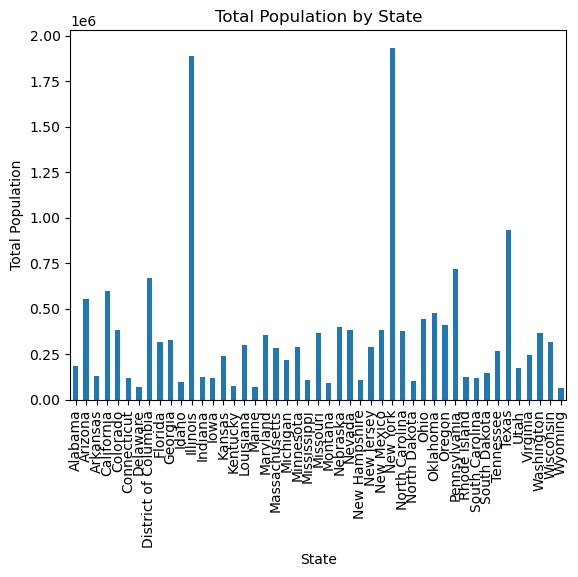

In [84]:
demogtotpopState.plot(kind='bar', stacked=True)
plt.title('Total Population by State')
plt.xlabel('State')
plt.ylabel('Total Population')

In [50]:
# Demographics percentage population over 21
demog21State = last_df.groupby(['State']).population_over_21_percent.mean()
demog21State 

State
Alabama                 74.312000
Arizona                 73.052632
Arkansas                71.650000
California              74.978360
Colorado                75.633992
Connecticut             72.826667
Delaware                79.100000
District of Columbia    76.900000
Florida                 77.268841
Georgia                 75.034146
Idaho                   71.766667
Illinois                75.201075
Indiana                 70.287179
Iowa                    72.390909
Kansas                  72.269231
Kentucky                67.200000
Louisiana               75.004762
Maine                   82.200000
Maryland                75.061111
Massachusetts           76.051429
Michigan                72.312500
Minnesota               74.059375
Mississippi             72.600000
Missouri                73.985714
Montana                 76.600000
Nebraska                71.946154
Nevada                  74.933333
New Hampshire           78.260000
New Jersey              75.400000
New Mexi

The top 3 states with more total population: Illinois, New York and Texas.

Text(0, 0.5, '% Population over 21')

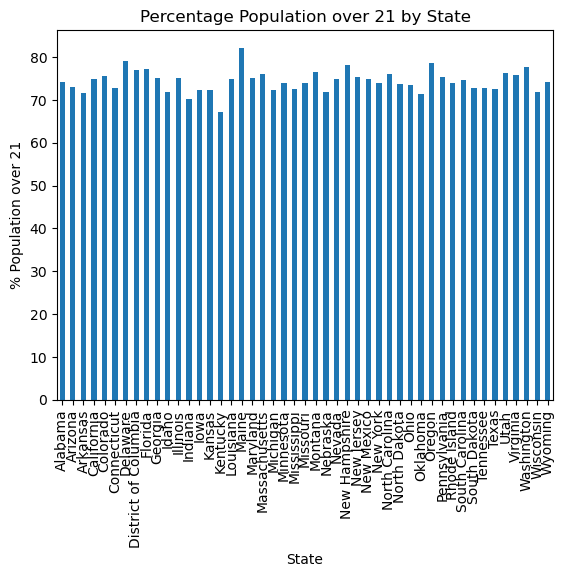

In [105]:
demog21State.plot(kind='bar', stacked=True)
plt.title('Percentage Population over 21 by State')
plt.xlabel('State')
plt.ylabel('% Population over 21')

Population over 21 seems to be evenly distributed across states

In [117]:
# Demographics housing
demoghousing = last_df.groupby(['State']).housing_in_structure_percent.mean()
demoghousing

State
Alabama                  93585.200000
Arizona                 230907.621053
Arkansas                 61697.538462
California              240443.900524
Colorado                180528.379447
Connecticut              51047.400000
Delaware                 37153.000000
District of Columbia    357482.000000
Florida                 147752.760870
Georgia                 164776.560976
Idaho                    36113.666667
Illinois                891099.043011
Indiana                  55723.000000
Iowa                     54607.121212
Kansas                  105494.730769
Kentucky                 32531.000000
Louisiana               151752.428571
Maine                    35456.000000
Maryland                177375.861111
Massachusetts           128772.428571
Michigan                102145.625000
Minnesota               136018.921875
Mississippi              54019.000000
Missouri                175119.828571
Montana                  43169.823529
Nebraska                172860.461538
Nevada

Text(0, 0.5, 'Housing')

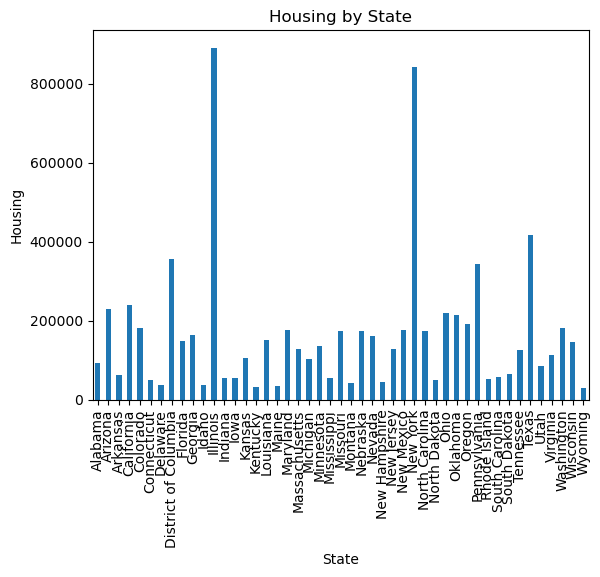

In [118]:
demoghousing.plot(kind='bar', stacked=True)
plt.title('Housing by State')
plt.xlabel('State')
plt.ylabel('Housing')

In [ ]:
# Plot demographics per City

In [37]:
# Demographics
demogCity = last_df.groupby(['State', 'City']).population_total.mean()
demogCity

State      City      
Alabama    Birmingham    196410.0
           Dothan         71283.0
           Huntsville    215482.0
           Mobile        184960.0
           Montgomery    198659.0
                           ...   
Wisconsin  Milwaukee     569326.0
           Oshkosh        66594.0
           Racine         77131.0
           Waukesha       71254.0
Wyoming    Cheyenne       65048.0
Name: population_total, Length: 452, dtype: float64

In [114]:
demogCity.unstack()

City,Abilene,Akron,Alameda,Albany,Albuquerque,Alexandria,Allen,Allentown,Alpharetta,Amarillo,...,Wilmington,Winston-Salem,Woodbury,Worcester,Wyoming,Yakima,Yonkers,Yorba Linda,Yuba City,Yuma
State,,,,,,,,,,,,,,,,,,,,,
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.7
Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,NaN,NaN,76.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.7,72.9,NaN
Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,79.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
CitytopStates = demogCity.loc(['Illinois', 'Texas', 'New York'], :)

SyntaxError: invalid syntax (3014211379.py, line 1)

Text(0, 0.5, 'Total Population')

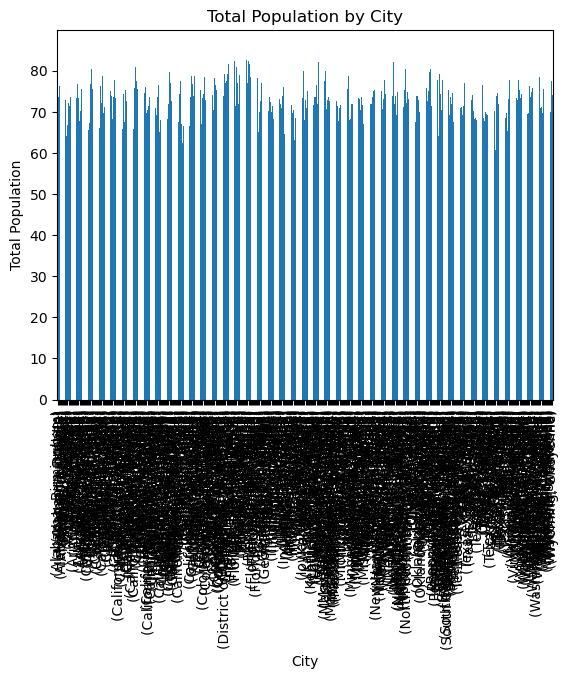

In [106]:
# Plot population per top 1 State 'Illinois'
demogCity.plot(kind='bar', y='Illinois', stacked=True)
plt.title('Total Population by City')
plt.xlabel('City')
plt.ylabel('Total Population')

In [107]:
# Population over 21 per city
demog21City = last_df.groupby(['State', 'City']).population_over_21_percent.mean()
demogCity

State      City      
Alabama    Birmingham    75.4
           Dothan        73.6
           Huntsville    76.3
           Mobile        74.0
           Montgomery    71.1
                         ... 
Wisconsin  Milwaukee     68.7
           Oshkosh       76.3
           Racine        70.0
           Waukesha      77.4
Wyoming    Cheyenne      74.1
Name: population_over_21_percent, Length: 452, dtype: float64

Text(0, 0.5, 'Percentage Population over 21')

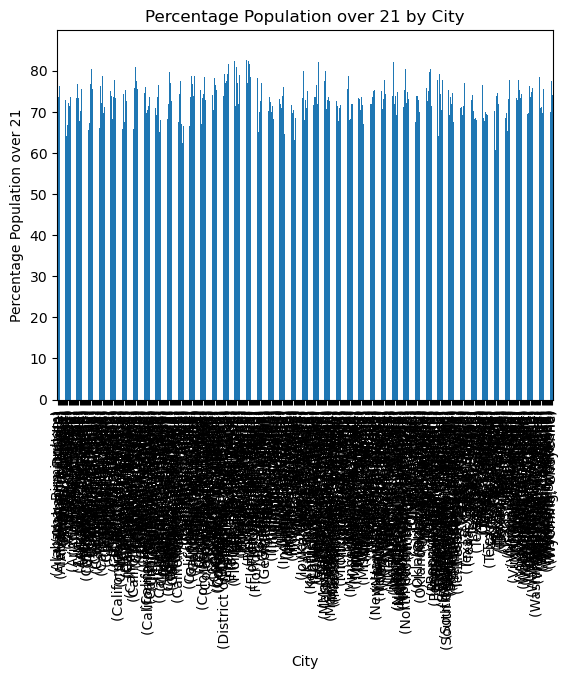

In [108]:
# Plot population over 21 per top 3 cities
demog21City.plot(kind='bar', y=['Illinois', 'New York', 'Texas'], stacked=True)
plt.title('Percentage Population over 21 by City')
plt.xlabel('City')
plt.ylabel('Percentage Population over 21')

In [ ]:
# Correlate Pop Brew

TotPop = demogtotpopState.loc['Illinois', 'New York', 'Texas']
BrewType = data_count4.loc['Illinois', 'New York', 'Texas']
correlation = st.pearsonr(TotPop,BrewType)
plt.scatter(TotPop,BrewType)
plt.title('Breweries by Total Population')
plt.xlabel('Total Population')
plt.ylabel('Breweries')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()